In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
def plot2_2(lat,lat_s):

    #Calculation
    x = np.sin(np.deg2rad(lat))
    x_s = np.sin(np.deg2rad(lat_s))
    Q = 344. #W/m**2
    s = 1. - 0.241*(3*x**2 - 1)
    curvyA = absorption(x,x_s)
    A = 211.1 #W/m**2
    B = 1.55  #W/m**2/K
    temp = (Q*s*curvyA - A)/B

    #Plotting
    tick_locations = np.array([0.0,0.2,0.4,0.6,0.8,x_s,1.0])
    second_locations = np.trunc(np.rad2deg(np.arcsin(tick_locations)))

    fig, ax = plt.subplots(figsize = [8,4],constrained_layout=True)
    fig.suptitle("Figure 2.2")

    ax.set_xlabel(r"x ($\sin{\theta}$) [dimensionless]")
    ax.set_ylabel(r"Temperature [$^\circ$C]")
    ax.plot(x,temp,c='k',linewidth=3)
    ax.axvline(x_s,c='k',linestyle='dashed')
    ax.set_xlim(x[0],x[-1])
    ax.set_xticks(tick_locations)

    axtwinx = ax.twiny()
    axtwinx.set_xlabel(r"Latitude ($\theta$) [$^\circ$]")
    axtwinx.set_xlim(ax.get_xlim())
    axtwinx.set_xticks(tick_locations)
    axtwinx.set_xticklabels(second_locations)

    return

def plot2_3(lat_s):

    #Calculation
    x_s = np.sin(np.deg2rad(lat_s))
    s = 1. - 0.241*(3*x_s**2 - 1)
    sarray = np.tile(s, (3,1))
    q = np.zeros_like(sarray)
    print(sarray.shape)
    curvyA = np.array([0.4,0.7,(0.4 + 0.7)/2])
    for i in range(3) : q[i,:] = 1 / (sarray[i,:] * curvyA[i])
    
    #Plotting
    fig, ax = plt.subplots(figsize=[8,4],constrained_layout=True)
    fig.suptitle("Figure 2.3")

    colors = ["tab:red","tab:blue","k"]
    labels = [r"$q^+$",r"$q^-$","small conductivity"]
    for i in range(3) : ax.plot(q[i,:],lat_s,c=colors[i],label=labels[i])
    ax.set_xlabel(r"$Q / \widetilde{I_s}$ [Dimensionless]")
    ax.set_ylabel(r"Ice Lat $\theta_s$ [$^\circ$]")
    ax.legend()
    ax.set_ylim(lat_s[0],lat_s[-1])
    return

def absorption(x,x_s):
    alpha = 0.4
    beta  = 0.7
    curvyA = np.where(x>=x_s,alpha,beta)
    
    return curvyA

(3, 89)


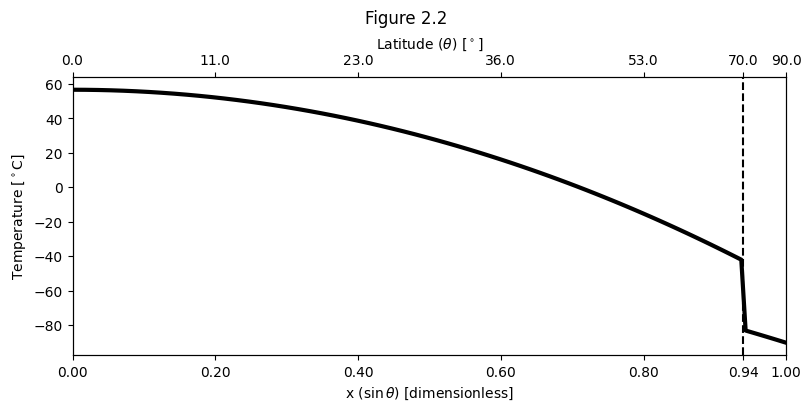

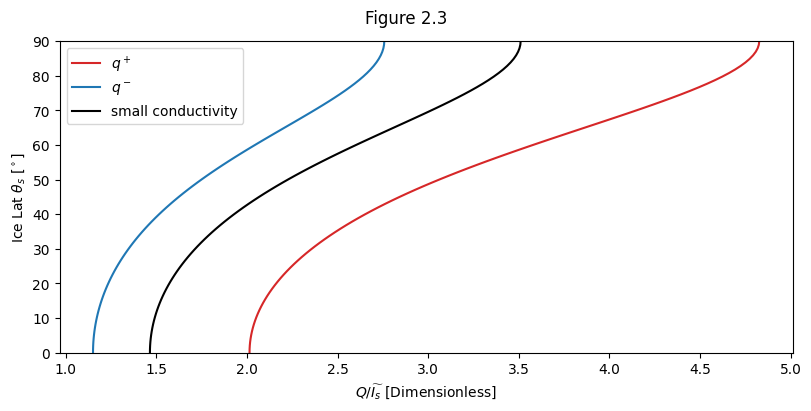

In [3]:
latitude = np.linspace(0,90,89)
plot2_2(latitude,70)
plot2_3(latitude)

In [91]:
def iceline(beta, alpha=np.array([0.4])):
    beta_arr = np.tile(beta, (len(alpha),1))
    x_s = np.zeros_like(beta_arr)
    alpha_nom = 0.4
    beta_nom = 0.7
    x_s_nom = 0.9397  #sin(70 degrees)
    i_tilde_bar = (beta_nom-alpha_nom)*(1.241*x_s_nom - 0.241*x_s_nom**3) + alpha_nom
    print(i_tilde_bar)
    
    for i in range(len(alpha)) : 
        for j in range(len(beta)) :
            x_s[i,j] =  np.roots([1,0,-1.241/0.241,(alpha[i] - i_tilde_bar)/(0.241*(alpha[i] - beta_arr[i,j]))])[2]
    #np.sqrt((1.241/0.241) + 0.241*(alpha[i]-i_tilde_bar) / (beta_arr[i,:]- alpha[i]))
    print(x_s)
    fig, ax = plt.subplots(2,1,figsize=[8,4],constrained_layout=True)
    fig.suptitle("ice line as function of beta")

    colors = ["tab:red","tab:blue","k"]
    labels = [r"$\alpha = 0.4$",r"$\alpha = 0.45$"]
    for i in range(len(alpha)) : ax[0].plot(beta_arr[i,:],x_s[i,:],c=colors[i],label=labels[i])
    for i in range(len(alpha)) : ax[1].plot(beta_arr[i,:],np.rad2deg(np.arcsin(x_s[i,:])),c=colors[i],label=labels[i])
    #ax.set_xlabel(r"$Q / \widetilde{I_s}$ [Dimensionless]")
    #ax.set_ylabel(r"Ice Lat $\theta_s$ [$^\circ$]")
    ax[0].legend()
    ax[1].legend()
    #ax.set_ylim(0.0,1.0)
    return    

0.689856564304212
[[0.99904643 0.99505515 0.9911234  0.98724903 0.98343002 0.97966449
  0.97595064 0.97228678 0.96867132 0.96510275 0.96157965 0.95810065
  0.95466447 0.95126988 0.94791572 0.94460087 0.94132427 0.93808492
  0.93488184 0.93171412 0.92858086 0.92548122 0.92241439 0.91937959
  0.91637607 0.91340311 0.91046001 0.90754613 0.90466081 0.90180344
  0.89897342 0.89617018 0.89339318 0.89064187 0.88791574 0.8852143
  0.88253705 0.87988354 0.87725332 0.87464594 0.87206099 0.86949806
  0.86695674 0.86443666 0.86193743 0.85945871 0.85700013 0.85456135
  0.85214204 0.84974188 0.84736056 0.84499776 0.84265319 0.84032656
  0.83801758 0.835726   0.83345153 0.83119391 0.8289529  0.82672824
  0.82451969 0.82232702 0.82015    0.8179884  0.815842   0.81371059
  0.81159396 0.80949191 0.80740423 0.80533073 0.80327123 0.80122552
  0.79919344 0.7971748  0.79516942 0.79317714 0.79119779 0.78923121
  0.78727723 0.7853357  0.78340646 0.78148936 0.77958425 0.777691
  0.77580945 0.77393947 0.7720809

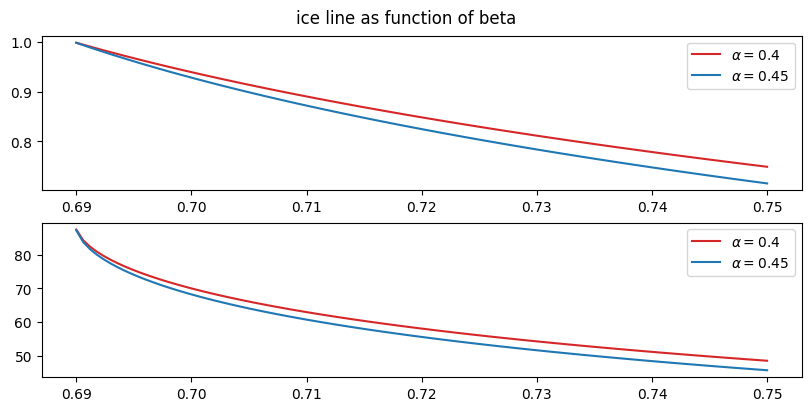

In [93]:
iceline(np.linspace(0.69,0.75,100),alpha=np.array([0.4,0.45]))

In [99]:
def coverb(beta, alpha=np.array([0.4])):
    beta_arr = np.tile(beta, (len(alpha),1))
    A = 211.1 #W/m**2
    B = 1.55  #W/m**2/K
    T_s = -10.0 #C
    Q = 344.0 #W/m**2
    x_s = np.sin(np.deg2rad(70.0))
    sx = 1. - 0.241*(3*x_s**2 - 1)
    curvyA = (0.7 + alpha[0])/2
    i_tilde = (A+B*T_s)/Q
    print(i_tilde)
    i_tilde_bar = (beta - alpha)*(1.241*x_s - 0.241*x_s**3) + alpha
    coverb = (sx*curvyA - i_tilde) / (i_tilde - i_tilde_bar)

    fig, ax = plt.subplots(figsize=[8,4],constrained_layout=True)
    fig.suptitle("ice line as function of beta")

    colors = ["tab:red","tab:blue","k"]
    labels = [r"$\alpha = 0.4$",r"$\alpha = 0.45$"]
    for i in range(len(alpha)) : ax.plot(beta_arr[i,:],coverb[i,:],c=colors[i],label=labels[i])
    #ax.set_xlabel(r"$Q / \widetilde{I_s}$ [Dimensionless]")
    #ax.set_ylabel(r"Ice Lat $\theta_s$ [$^\circ$]")
    ax.legend()
    
    #ax.set_ylim(0.0,1.0)
    return

In [101]:
coverb(np.linspace(0.69,0.75,100),alpha=np.array([0.4,0.45]))

0.5686046511627907


ValueError: operands could not be broadcast together with shapes (100,) (2,) 